In [1]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

print("依赖库已导入")

依赖库已导入


In [2]:
# 文件路径
regen_file = "../outputs/regenerated_sentences.json"
desc_file = "../outputs/descriptions.json"
image_dir = "../images/"

# 检查文件是否存在
if not os.path.exists(regen_file):
    raise FileNotFoundError(f"未找到 {regen_file}")
if not os.path.exists(desc_file):
    raise FileNotFoundError(f"未找到 {desc_file}")
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"未找到图片目录 {image_dir}")

print(f"文件路径已设置：\n- 重新生成句子: {regen_file}\n- 描述: {desc_file}\n- 图片目录: {image_dir}")

文件路径已设置：
- 重新生成句子: ../outputs/regenerated_sentences.json
- 描述: ../outputs/descriptions.json
- 图片目录: ../images/


In [3]:
# 加载重新生成数据
with open(regen_file, "r", encoding="utf-8") as f:
    regen_data = json.load(f)

# 加载描述数据
with open(desc_file, "r", encoding="utf-8") as f:
    desc_data = json.load(f)

# 创建描述字典
desc_dict = {item["image"]: item["description"] for item in desc_data}

# 过滤替换句子（rejected-chosen 对）
replaced_pairs = [
    item for item in regen_data
    if item["rejected"] != item["chosen"]
]

# 统计信息
total_sentences = len(regen_data)
replaced_count = len(replaced_pairs)
print(f"总句子数: {total_sentences}")
print(f"替换句子数: {replaced_count}")
print(f"替换率: {replaced_count / total_sentences:.2%}")

总句子数: 38
替换句子数: 38
替换率: 100.00%


In [4]:
# 按图片分组
pairs_by_image = {}
for item in replaced_pairs:
    img_path = '.' + item["image"]
    if img_path not in pairs_by_image:
        pairs_by_image[img_path] = []
    pairs_by_image[img_path].append({
        "rejected": item["rejected"],
        "chosen": item["chosen"],
    })

# 转换为 DataFrame
df_pairs = pd.DataFrame([
    {"image": img_path, "pairs": pairs}
    for img_path, pairs in pairs_by_image.items()
])
df_pairs["description"] = df_pairs["image"].map(desc_dict)

# 显示前几行
print(f"涉及替换的图片数: {len(df_pairs)}")
display(df_pairs[["image", "description", "pairs"]].head())

涉及替换的图片数: 31


image description  \
0  ../images/train2017/000000363489.jpg         NaN   
1  ../images/train2017/000000065859.jpg         NaN   
2  ../images/train2017/000000366430.jpg         NaN   
3  ../images/train2017/000000574675.jpg         NaN   
4  ../images/train2017/000000437391.jpg         NaN   

                                               pairs  
0  [{'rejected': 'This dog is positioned on all f...  
1  [{'rejected': 'The train's windows reflect the...  
2  [{'rejected': 'The passenger, dressed in a bla...  
3  [{'rejected': 'Both are focused on their respe...  
4  [{'rejected': 'The image depicts a section of ...

/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


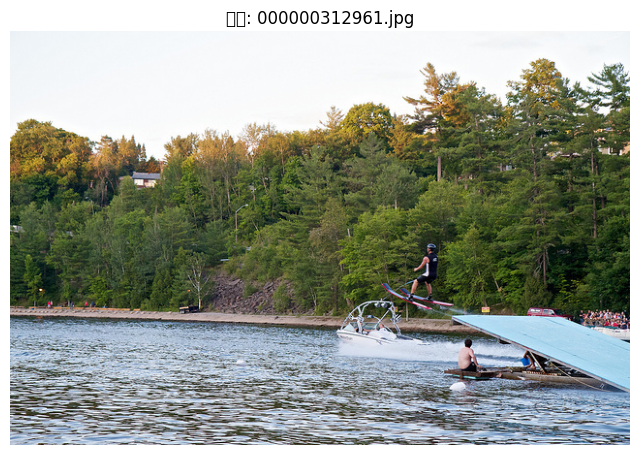

Rejected-Chosen 对:
- Rejected: The individual is wearing a dark-colored life vest for safety.
  Chosen: The person is wearing a light-colored life vest for safety.
--------------------------------------------------


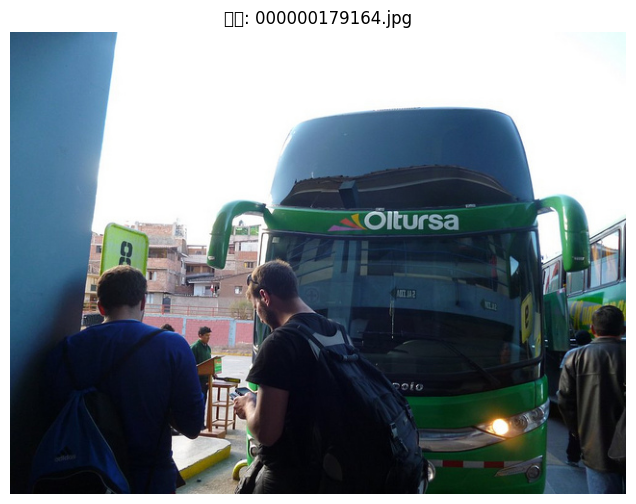

Rejected-Chosen 对:
- Rejected: In the background, there are additional people visible, some of whom appear to be waiting for their turn to board the bus.
  Chosen: "In the background, several individuals can be seen near the bus, possibly preparing to board or waiting for their turn."
--------------------------------------------------


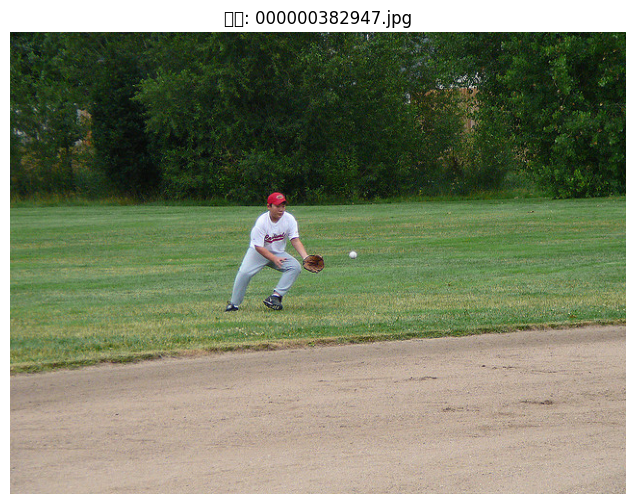

Rejected-Chosen 对:
- Rejected: The individual appears to be in a crouched stance, holding a baseball glove in one hand, ready to catch or throw the ball.
  Chosen: The person is positioned in a crouched stance, gripping a baseball glove with one hand, prepared to either catch or throw the ball.
--------------------------------------------------


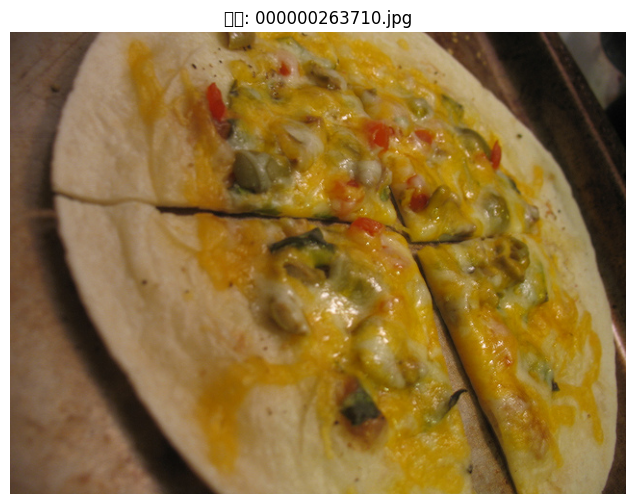

Rejected-Chosen 对:
- Rejected: The flatbread is cut into two triangular sections, revealing its filling.
  Chosen: The flatbread is sliced into three triangular pieces, showcasing its cheesy and vegetable-filled interior.
--------------------------------------------------


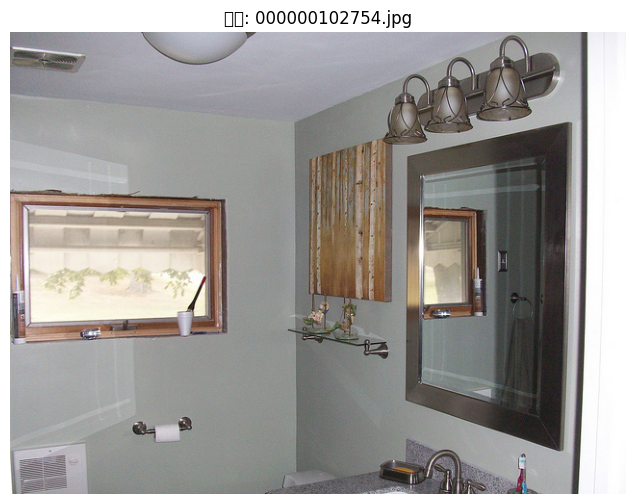

Rejected-Chosen 对:
- Rejected: The window has a frosted glass panel, which diffuses the light and provides privacy.
  Chosen: The window features a decorative screen with a floral pattern, adding a touch of nature to the space.
--------------------------------------------------


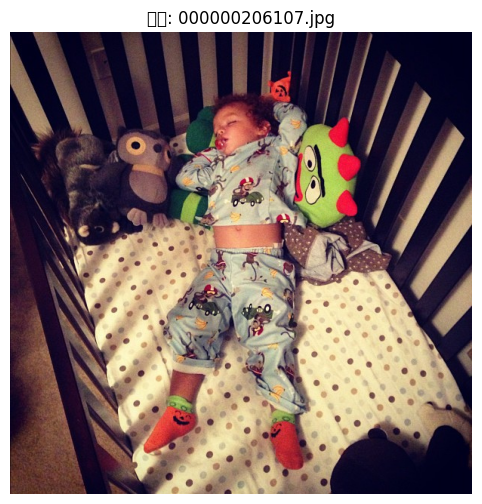

Rejected-Chosen 对:
- Rejected: Surrounding the child are several plush toys: a gray elephant, a brown monkey, and a green dinosaur with red heart-shaped spots on its body.
  Chosen: The child is surrounded by several plush toys: a gray elephant, a brown monkey, and a green dinosaur adorned with red heart-shaped spots on its body.
--------------------------------------------------


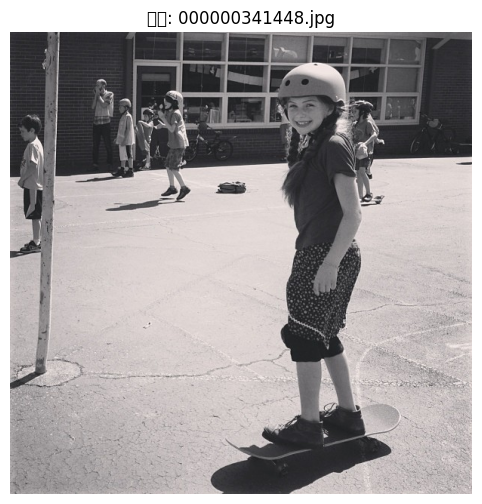

Rejected-Chosen 对:
- Rejected: Some appear to be playing with bicycles, while others seem to be interacting with each other.
  Chosen: A child is skateboarding in a paved area, wearing a helmet and smiling, with other children in the background engaged in various activities.
--------------------------------------------------


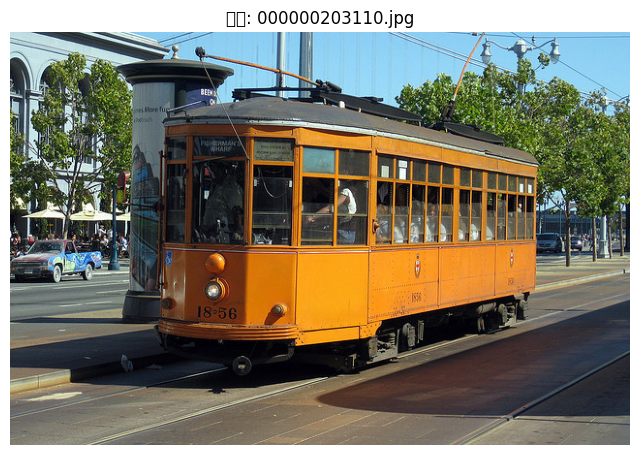

Rejected-Chosen 对:
- Rejected: In the background, there are other vehicles, including cars and bicycles, suggesting a bustling city atmosphere.
  Chosen: "In the background, various vehicles such as cars and bicycles can be seen, indicating a lively urban setting."
- Rejected: The presence of pedestrians and the general activity in the area imply a lively community scene.
  Chosen: "The vibrant orange streetcar, with its passengers visible through the windows, adds a dynamic element to the urban setting."
- Rejected: The streetcar appears to be in motion, as suggested by the slight blur of the wheels and the dynamic positioning of the vehicle relative to the surrounding elements.
  Chosen: The streetcar is stationary, with clear visibility of its details and surroundings, including the passengers inside and the urban environment around it.
--------------------------------------------------


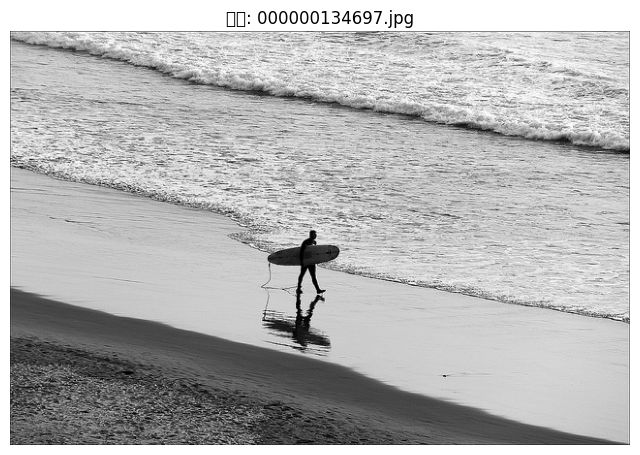

Rejected-Chosen 对:
- Rejected: The surfboard is positioned horizontally across the person's body, suggesting they have just finished surfing or are heading towards the water to do so.
  Chosen: "The silhouette of a person carrying a surfboard along the shoreline indicates they might be heading towards the ocean for surfing."
--------------------------------------------------


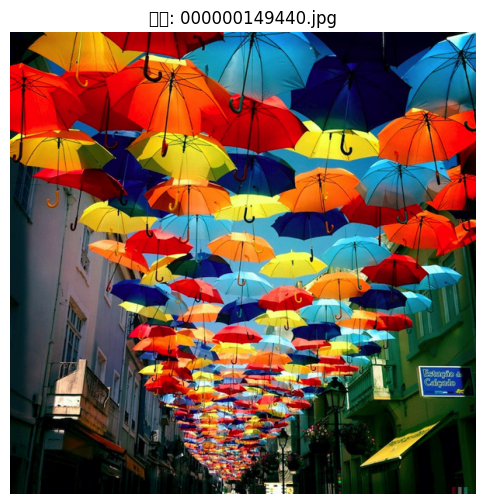

Rejected-Chosen 对:
- Rejected: The umbrellas are of different sizes and shapes, some appearing larger and more prominent than others, which adds depth and visual interest to the composition.
  Chosen: The umbrellas are of various colors and sizes, creating a vibrant and dynamic scene with a sense of depth and visual appeal.
- Rejected: The shadows cast by the umbrellas on the buildings suggest that the sun is positioned at a high angle, possibly midday.
  Chosen: The vibrant colors of the hanging umbrellas create a striking contrast against the buildings, suggesting a lively and artistic urban setting.
--------------------------------------------------
已显示 10 张图片，停止


In [5]:
# 设置显示参数
max_display = 10  # 最多显示 10 张图片
plt.rcParams["figure.figsize"] = (8, 6)

# 打乱
df_pairs = df_pairs.sample(frac=1).reset_index(drop=True)

# 按图片显示
for idx, row in df_pairs.iterrows():
    if idx >= max_display:
        print(f"已显示 {max_display} 张图片，停止")
        break
    
    img_path = row["image"]
    pairs = row["pairs"]
    
    # 检查图片是否存在
    full_img_path = img_path  # 路径已包含 images/
    if not os.path.exists(full_img_path):
        print(f"图片不存在: {full_img_path}")
        continue
    
    # 加载并显示图片
    img = Image.open(full_img_path)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"图片: {os.path.basename(img_path)}")
    plt.show()
    
    # 显示rejected-chosen 对
    print("Rejected-Chosen 对:")
    for pair in pairs:
        print(f"- Rejected: {pair['rejected']}")
        print(f"  Chosen: {pair['chosen']}")
    print("-" * 50)

In [ ]:
# 统计句子长度
df_pairs["pair_count"] = df_pairs["pairs"].apply(len)
print("每张图片的替换对数统计:")
print(df_pairs["pair_count"].describe())

# 计算 rejected 和 chosen 句子长度
all_rejected = [pair["rejected"] for pairs in df_pairs["pairs"] for pair in pairs]
all_chosen = [pair["chosen"] for pairs in df_pairs["pairs"] for pair in pairs]
rejected_lengths = [len(sent.split()) for sent in all_rejected]
chosen_lengths = [len(sent.split()) for sent in all_chosen]

# 绘制长度分布
plt.figure(figsize=(10, 5))
plt.hist(rejected_lengths, bins=20, alpha=0.5, label="Rejected")
plt.hist(chosen_lengths, bins=20, alpha=0.5, label="Chosen")
plt.title("Rejected vs Chosen 句子长度分布")
plt.xlabel("词数")
plt.ylabel("频率")
plt.legend()
plt.show()

# 简单词差异分析
from collections import Counter
rejected_words = [word.lower() for sent in all_rejected for word in sent.split()]
chosen_words = [word.lower() for sent in all_chosen for word in sent.split()]
rejected_counter = Counter(rejected_words)
chosen_counter = Counter(chosen_words)

print("Rejected 句子中最常见的 10 个词:")
print(rejected_counter.most_common(10))
print("Chosen 句子中最常见的 10 个词:")
print(chosen_counter.most_common(10))

# 新增/删除的词
new_words = chosen_counter - rejected_counter
del_words = rejected_counter - chosen_counter
print("Chosen 相较 Rejected 新增的常见词:")
print(new_words.most_common(5))
print("Chosen 相较 Rejected 删除的常见词:")
print(del_words.most_common(5))